# Expansión en Series de Fourier

La expansión en Series de Fourier permite representar cualquier función periódica con una suma infinita de funciones sinusoidales. Estas funciones están compuestas por un armónico principal que oscila a la frecuencia fundamental e infinitos armónicos que oscilan con frecuencias que son multiplos enteros de la frecuencia fundamental

In [8]:
from IPython.display import Image
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym

%matplotlib inline

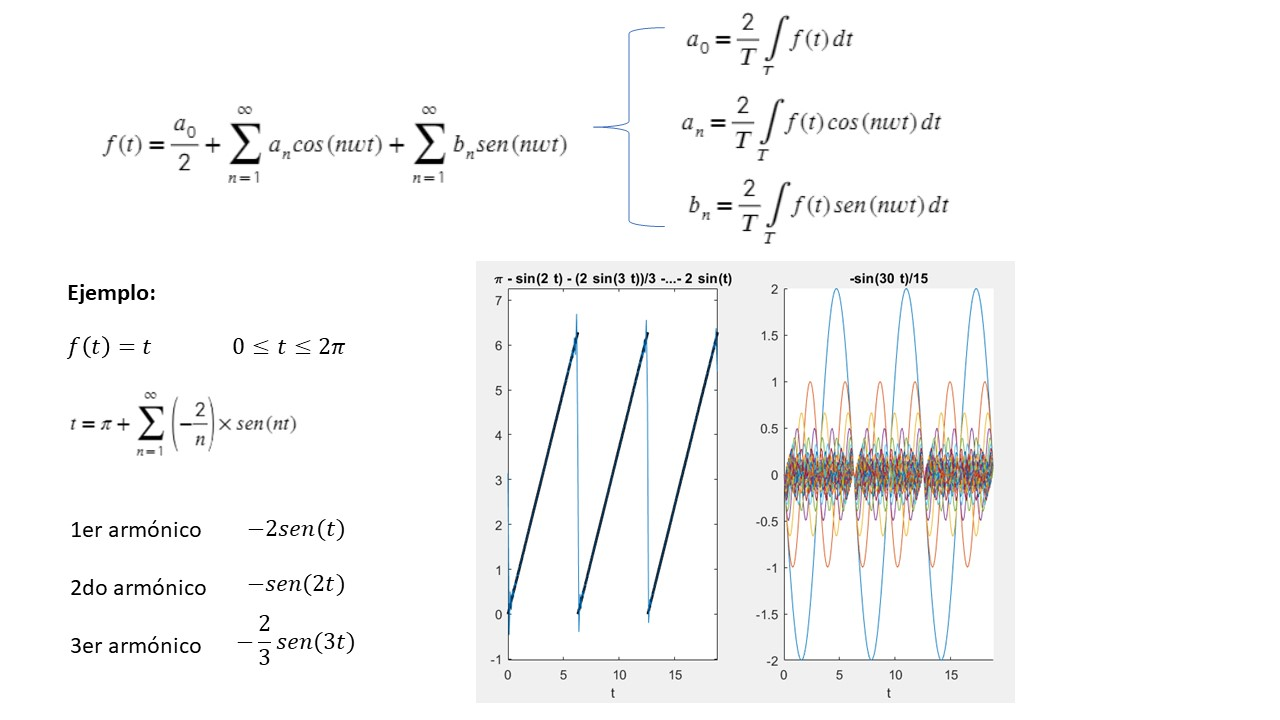

In [2]:
Image(filename='assets/SeriesFourier.jpg')

Vamos a encontrar la expansión en Series de Fourier de una función periódica mediante los siguientes pasos:

    *  Declaramos las variables simbólicas n y t
    *  Definimos la función periódica
    *  Calculamos los coeficientes de Fourier
    *  Usando los coeficientes representamos la expansión en Series de Fourier
    *  Graficamos la función periódica original y su expansión en Series de Fourier
    
Vamos a realizar el procedimiento para funciones convencionales y funciones declaradas por tramos

# 1. Función convencional 

### Declaramos las variables simbólicas n y t

In [2]:
n = sym.Symbol('n')
t = sym.Symbol('t')

### Definimos la función peridódica

In [3]:
Tmin = 0
Tmax = 2*np.pi

T=Tmax-Tmin
w = 2*np.pi/T

# ft es una función simbólica
ft=t

### Calculamos los coeficientes de Fourier

In [4]:
# Calculamos la integral para a0
f_integral = ft
a0 = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("a0 = ")
sym.pprint(a0)

# Calculamos la integral para an
f_integral = ft*sym.cos(n*w*t)
an = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
an = sym.simplify(an)
print("an = ")
sym.pprint(an)

# Calculamos la integral para bn
f_integral = ft*sym.sin(n*w*t)
bn = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("bn = ")
bn = sym.simplify(bn)
sym.pprint(bn)


a0 = 
6.28318530717959
an = 
⎧2.0⋅n⋅sin(6.28318530717959⋅n) + 0.318309886183791⋅cos(6.28318530717959⋅n) - 0
⎪─────────────────────────────────────────────────────────────────────────────
⎪                                               2                             
⎨                                              n                              
⎪                                                                             
⎪                                      6.28318530717959                       
⎩                                                                             

.318309886183791                            
────────────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
                                            
                                            
                                            
                          otherwise         
                                            
bn = 
⎧-2.0⋅n⋅cos(6.28318530717959⋅n) + 0.318309886183791⋅sin(6.28318530717959⋅n)   
⎪────────────────

### Usando los coeficientes representamos la expansión en Series de Fourier

In [7]:
# Definimos el número de armónicos para la expansión
serie = 0
Armonicos = 30

for i in range(1,Armonicos+1):
    
    # Evaluamos los coeficientes para cada armónico
    an_c = an.subs(n,i)
    bn_c = bn.subs(n,i)
    
    if abs(an_c) < 0.0001: an_c = 0
    if abs(bn_c) < 0.0001: bn_c = 0
        
    serie= serie + an_c*sym.cos(i*w*t) # Términos coseno de la serie
    serie = serie + bn_c*sym.sin(i*w*t) # Términos seno de la serie

serie = a0/2+serie  # Expansión final de la serie

print('f(t)= ')
sym.pprint(serie)

f(t)= 
-2.0⋅sin(1.0⋅t) - 1.0⋅sin(2.0⋅t) - 0.666666666666667⋅sin(3.0⋅t) - 0.5⋅sin(4.0⋅
t) - 0.4⋅sin(5.0⋅t) - 0.333333333333333⋅sin(6.0⋅t) - 0.285714285714286⋅sin(7.0
⋅t) - 0.25⋅sin(8.0⋅t) - 0.222222222222222⋅sin(9.0⋅t) - 0.2⋅sin(10.0⋅t) - 0.181
818181818182⋅sin(11.0⋅t) - 0.166666666666667⋅sin(12.0⋅t) - 0.153846153846154⋅s
in(13.0⋅t) - 0.142857142857143⋅sin(14.0⋅t) - 0.133333333333333⋅sin(15.0⋅t) - 0
.125⋅sin(16.0⋅t) - 0.117647058823529⋅sin(17.0⋅t) - 0.111111111111111⋅sin(18.0⋅
t) - 0.105263157894737⋅sin(19.0⋅t) - 0.1⋅sin(20.0⋅t) - 0.0952380952380952⋅sin(
21.0⋅t) - 0.0909090909090909⋅sin(22.0⋅t) - 0.0869565217391304⋅sin(23.0⋅t) - 0.
0833333333333333⋅sin(24.0⋅t) - 0.08⋅sin(25.0⋅t) - 0.0769230769230769⋅sin(26.0⋅
t) - 0.0740740740740741⋅sin(27.0⋅t) - 0.0714285714285714⋅sin(28.0⋅t) - 0.06896
55172413793⋅sin(29.0⋅t) - 0.0666666666666667⋅sin(30.0⋅t) + 3.14159265358979


### Graficamos la función periódica original y su expansión en Series de Fourier

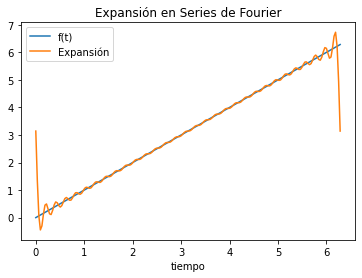

In [8]:
# Convertimos la expresión Sympy a una función evaluable
fserie = sym.lambdify(t,serie)
f = sym.lambdify(t,ft)

# Creamos un vector de tiempo para la gráfica
v_tiempo = np.linspace(Tmin,Tmax,200)

# Evaluamos las funciones
fserieG = fserie(v_tiempo)
fG = f(v_tiempo)
 
plt.plot(v_tiempo,fG,label = 'f(t)')
plt.plot(v_tiempo,fserieG,label = 'Expansión')

plt.xlabel('tiempo')
plt.legend()
plt.title('Expansión en Series de Fourier')
plt.show()

# 2. Función por tramos

### Declaramos las variables simbólicas n y t

In [20]:
n = sym.Symbol('n')
t=sym.Symbol('t')

### Definimos la función peridódica por tramos

In [21]:
Tmin = -3
Tmax = 3

T=Tmax-Tmin
w = 2*np.pi/T

f1=(2/3)*t+2
f2=-(2/3)*t+2

# ft es una función simbólica por tramos
ft = sym.Piecewise((f1, ((t <= 0) & (t >= -3))), (f2, ((t > 0) & (t <= 3))))
ft

Piecewise((0.666666666666667*t + 2, (t >= -3) & (t <= 0)), (2 - 0.666666666666667*t, (t <= 3) & (t > 0)))

### Calculamos los coeficientes de Fourier

In [22]:
# Calculamos la integral para a0
f_integral = ft
a0 = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("a0 = ")
sym.pprint(a0)

# Calculamos la integral para an
f_integral = ft*sym.cos(n*w*t)
an = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
an = sym.simplify(an)
print("an = ")
sym.pprint(an)

# Calculamos la integral para bn
f_integral = ft*sym.sin(n*w*t)
bn = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("bn = ")
bn = sym.simplify(bn)
sym.pprint(bn)

a0 = 
2.00000000000000
an = 
⎧4.44089209850063e-16⋅n⋅sin(3.14159265358979⋅n) - 0.405284734569351⋅cos(3.1415
⎪─────────────────────────────────────────────────────────────────────────────
⎪                                                       2                     
⎨                                                      n                      
⎪                                                                             
⎪                                                     2.0                     
⎩                                                                             

9265358979⋅n) + 0.405284734569351                            
─────────────────────────────────  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
                                                             
                                                             
                                                             
                                           otherwise         
                                             

### Usando los coeficientes representamos la expansión en Series de Fourier

In [25]:
# Definimos el número de armónicos para la expansión
serie = 0
Armonicos = 30

for i in range(1,Armonicos+1):
    
    # Evaluamos los coeficientes para cada armónico
    an_c = an.subs(n,i)
    bn_c = bn.subs(n,i)
    
    if abs(an_c) < 0.0001: an_c = 0
    if abs(bn_c) < 0.0001: bn_c = 0
        
    serie= serie + an_c*sym.cos(i*w*t) # Términos coseno de la serie
    serie = serie + bn_c*sym.sin(i*w*t) # Términos seno de la serie

serie = a0/2+serie  # Expansión final de la serie

print('f(t)= ')
sym.pprint(serie)

f(t)= 
0.810569469138702⋅cos(1.0471975511966⋅t) + 0.0900632743487447⋅cos(3.1415926535
8979⋅t) + 0.0324227787655481⋅cos(5.23598775598299⋅t) + 0.0165422340640551⋅cos(
7.33038285837618⋅t) + 0.0100070304831939⋅cos(9.42477796076938⋅t) + 0.006698921
23255126⋅cos(11.5191730631626⋅t) + 0.004796269048158⋅cos(13.6135681655558⋅t) +
 0.00360253097394979⋅cos(15.707963267949⋅t) + 0.00280473864753876⋅cos(17.80235
83703422⋅t) + 0.0022453447898579⋅cos(19.8967534727354⋅t) + 0.00183802600711724
⋅cos(21.9911485751286⋅t) + 0.00153226742748337⋅cos(24.0855436775217⋅t) + 0.001
29691115062192⋅cos(26.1799387799149⋅t) + 0.00111189227591043⋅cos(28.2743338823
081⋅t) + 0.000963816253434842⋅cos(30.3687289847013⋅t) + 1.0


### Graficamos la función periódica original y su expansión en Series de Fourier

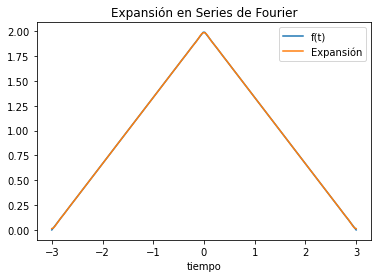

In [26]:
# Convertimos la expresión Sympy a una función evaluable
fserie = sym.lambdify(t,serie)
f = sym.lambdify(t,ft)

# Creamos un vector de tiempo para la gráfica
v_tiempo = np.linspace(Tmin,Tmax,200)

# Evaluamos las funciones
fserieG = fserie(v_tiempo)
fG = f(v_tiempo)
 
plt.plot(v_tiempo,fG,label = 'f(t)')
plt.plot(v_tiempo,fserieG,label = 'Expansión')

plt.xlabel('tiempo')
plt.legend()
plt.title('Expansión en Series de Fourier')
plt.show()

# Taller

Definir la función valor absoluto de t por tramos (|t|). Realizar la expansión en Series de Fourier de forma analítica y comprobar el resultado mediante la solución en python. Obtener la expansión usando 5 armónicos.